# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

**[Step 1. Open the data file and study the general information](#step1)**

 [First conclusions](#step1.1)
 
 
 **[Step 2. Data Preprocessing](#step2)**
 
 [Missing Values](#step2.1)
 
 [Filling Missing Values](#step2.2)
  
 [Change days_posted type from object (string) to date](#step2.3)
 
 
  **[Step 3. Make calculations and add them to the table](#step3)**
 
  [Adding new columns](#step3.1)
  
  [Edit condition column](#step3.4)
 
  [Fill missing values in cylinders column](#step3.5)
  
  [Drop values](#step3.6)
  
  [Add estimated year model column using median](#step3.7)
  

  **[Step 4. Exploratory Data Analysis](#step4)**
  
  [Preliminary analysis of the data using histograms](#step4.1)
  
  [Preliminary scatter plots](#step4.3)
 
  [Identify outliars](#step4.4)
  
  [Removing outliars to a new table](#step4.5)
  
  [Analysis of the data after filtering outliars](#step4.6)
  
  [Days listed analysis](#step4.9)
  
  [Analyze the number of ads and the average price for each type of vehicle](#step4.93)
  
  [Type 'truck' analysis](#step4.94)
  
  [Type 'SUV' analysis](#step4.95)
  
  
  **[Step 5. Overall conclusion](#step5)**
  
  

 

 


<a class="anchor" id="step1"></a>

### Step 1. Open the data file and study the general information. 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
#import cufflinks as cf
import datetime as dt
from functools import reduce
from scipy import stats as st
import plotly.express as px
import scipy.stats as stats
import plotly.graph_objects as go
#import chart_studio.plotly as py
import usaddress

%matplotlib inline

#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected = True)
#cf.go_offline()

import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

        
        
        

        

#vehicles = pd.read_csv('/datasets/vehicles_us.csv')
vehicles = pd.read_csv('vehicles_us.csv')

display(vehicles.head(5))
#display(vehicles.info())
#display(vehicles.describe())

#display(vehicles.model.unique())

#vehicles.hist('price', bins = 10, range = (10000, 50000))


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


<a class="anchor" id="step1.1"></a>

#### First conclusions

* Over 50000 cars listed in the data.
* Mean price of 12132, with std of 10040, proves that the car most be categorized, presumbly by type. 
* Date posted is in object, meaning that for correct days posted - it should be changed to int, and then compered to today's date and changed in days_posted column.
* days_listed should be converted and calculated, as the can effect the sellers willinges to nagotiate and close a deal. More deals = better serivce of Crankshaft and higher traffic.


* #####  Intresting questions:
    - what detarmines the price more - the year or the condition?
    - How to plot the right graphs for the right questions - bins for indepdendnt data, scatter plots/ correlations for two or more variables/ histogram for one variable.
    - Assumption - days_posted might be good for data analysis shouldn't be a factor for the listed prices. The assumption is that similar cars with the similar conditions should be relatvily equal in pries, as it is detarmine by the market demands.
 

<a class="anchor" id="step2"></a>

### Step 2. Data preprocessing

<a class="anchor" id="step2.1"></a>

#### Missing values

In [3]:
# search missing vlaues in all columns
display(vehicles.isnull().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

#### Missing Values - Observations

* odometer, model_year and cylinders columns: Cruciel factors for determaning the price, therfore missing values will stay empty. During catgorization, either be removed or calculated otherwise, depands on their precentage in the data.

* paint_coulor column: NaN values are not significant, as color does not effect car performence and market values. NaN values will be converted to 'Unknown'.

* is_4wd column: NaN values mean there is no 4wd drive, missing values should be convert to 0.


<a class="anchor" id="step2.2"></a>
#### Fill missing values

In [4]:
# Fill missing values

# convert NaN values in is_4wd to 0 values
vehicles.is_4wd = vehicles.is_4wd.fillna(0)


# convert NaN values in paint_color to 'unknown' value.
vehicles.paint_color = vehicles.paint_color.fillna('unknown')

# check conversions
# display(vehicles.isnull().sum())
# display(vehicles.head(10))

<a class="anchor" id="step2.3"></a>
#### Change days_posted type from object (string) to date

In [5]:
vehicles['date_posted'] = pd.to_datetime(vehicles['date_posted'], format='%Y-%m-%d')

#display(vehicles.head(10))
#display(vehicles.info())

<a class="anchor" id="step3"></a>
### Step 3. Make calculations and add them to the table

<a class="anchor" id="step3.1"></a>
##### Add columns for days of the week, month and year the ad was places

In [6]:
vehicles['day_posted'] = vehicles['date_posted'].dt.day
vehicles['month_posted'] = vehicles['date_posted'].dt.month
vehicles['year_posted'] = vehicles['date_posted'].dt.year


##### Add a column of vehicle age in years 

In [7]:
# add a column of vehicles age in years: 
vehicles['car_age'] = vehicles['date_posted'].dt.year - vehicles['model_year']


#### Add a column of vehicle averge mileage per year

In [8]:
vehicles['average_mileage'] = vehicles['odometer'] / vehicles['car_age']

# if vaerage_mileage = 0 (for cars with 'car_age' = 0, then use the current odometer as avg mileage)
vehicles.loc[(vehicles.average_mileage == np.inf), 'average_mileage'] = vehicles.odometer

<a class="anchor" id="step3.4"></a>
##### Edit condition column: replace string valeus with numeric scale 

In [10]:
vehicles['date_posted'] = pd.to_datetime(vehicles['date_posted'], format='%Y-%m-%d')

# add a column of vehicles age in years: 
vehicles['car_age'] = vehicles['date_posted'].dt.year - vehicles['model_year']


for i in vehicles.condition:
    if i == 'new':
        vehicles.condition.replace(i, 5, inplace = True)
    if i == 'like new':
        vehicles.condition.replace(i, 4, inplace = True)
    if i == 'excellent':
        vehicles.condition.replace(i, 3, inplace = True)
    if i == 'good':
        vehicles.condition.replace(i, 2, inplace = True)
    if i == 'fair':
        vehicles.condition.replace(i, 1, inplace = True)
    if i == 'salvage':
        vehicles.condition.replace(i, 0, inplace = True)           

        
display(vehicles.head(5))

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_age,average_mileage
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,23,6,2018,7.0,20714.285714
1,25500,NaN,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,19,10,2018,NaN,NaN
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,7,2,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,1,8.0,gas,NaN,automatic,pickup,unknown,0.0,2019-03-22,9,22,3,2019,16.0,NaN
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2,4,2019,2.0,40451.500000


<a class="anchor" id="step3.5"></a>
#####  Fill missing values in cylinders column 

In [10]:
vehicles['cylinders'] = vehicles.groupby('model')['cylinders'].fillna(method = 'ffill')

#display(vehicles.head(10))

<a class="anchor" id="step3.6"></a>
##### drop values

* check missing values, drop cars without both odometer & car age:
cars without both odometer and age are droped, as missing both values which are highly critical for price research, makes the instance/row useless.

In [11]:
# check for missing values with various conditions
# display(vehicles.isnull().sum())


# check for cars without both odometer & car_Age
#display(len(vehicles[(vehicles['car_age'].isnull()) & (vehicles['odometer'].isnull())]))


# drop cars without both odometer & car_Age
condition = vehicles[(vehicles['car_age'].isnull()) & (vehicles['odometer'].isnull())].index
vehicles.drop(condition, axis = 0, inplace = True)

## check for cars without both odometer & car_Age  
#display(len(vehicles[(vehicles['car_age'].isnull()) & (vehicles['odometer'].isnull())]))
  
    
    
#check for missing values
#display(vehicles.isnull().sum())

<a class="anchor" id="step3.7"></a>
##### Add column of estimated year for each model, using median

In [12]:
# Creat a new column called est_year (estimated year). 
# Then, used the est_year together with date_posted to complete the avg mileage column. As it is already full of false assumptions, I intserted the number instead of creating an additional column

vehicles['year_est'] = vehicles['model_year'].fillna(vehicles.groupby('model')['model_year'].transform('median'))


In [13]:
# fill in missing mileage using est_year_model 

        
# fill missing car_mileage
vehicles['average_mileage'] =  vehicles['average_mileage'].fillna(vehicles['odometer'] / (vehicles['date_posted'].dt.year - vehicles['year_est']))   
        
# round values        
vehicles['average_mileage'] =  vehicles['average_mileage'].round()  


#vehicles.head(10)

#display(vehicles.isnull().sum())


<a class="anchor" id="step4"></a>
### Step 4. Carry out exploratory data analysis

<a class="anchor" id="step4.1"></a>
#### Preliminary analysis of the data using histograms

<div class="alert alert-info"> <b>Using for loop for histograms:</b> </div>

In [14]:
import numpy as np
import matplotlib.pyplot as plt 

#hist_columns = ['price', 'car_age', 'condition', 'odometer', 'condition']

#for i in vehicles[hist_columns]:
#    column_obj = vehicles[i]
#    plt.hist(column_obj)    
#    plt.title(i)
#    plt.show()

### another way to run the loop:
    
# for loop with get_nummeric_data for all columns.     
    
#for i in vehicles._get_numeric_data().columns:
#    plt.hist(vehicles[i])    
#    plt.title(i)
#    plt.show()

    

#-----------------Vehicles Data Histograms-----------------#



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc895ee1790>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc893aaa510>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8938584d0>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8d13ad650>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc898559250>]],
      dtype=object)

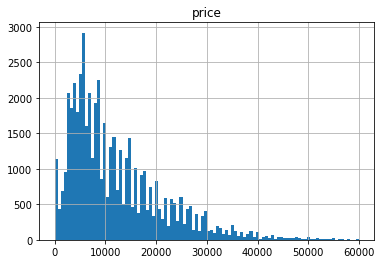

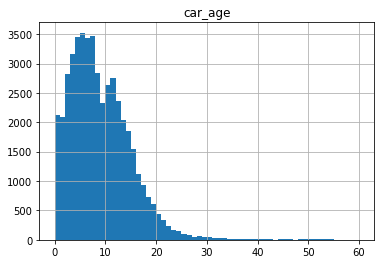

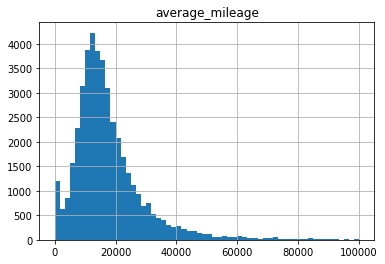

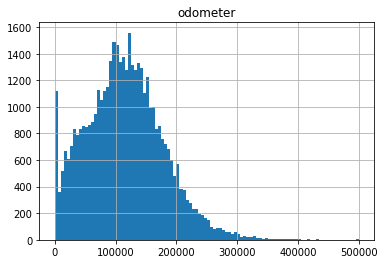

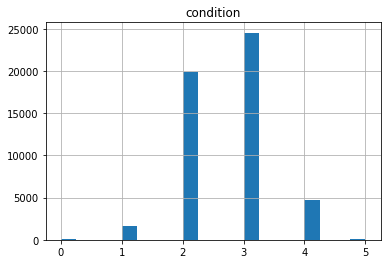

In [15]:
# Preliminary analysis of the data using histograms

### stage 1. plot histograms for the columns: price, car_age, odometer, cylinders and condition.


print('#-----------------Vehicles Data Histograms-----------------#\n')

display(vehicles.hist('price', bins = 100, range = (0, 60000)))
#display(vehicles.price.describe())

display(vehicles.hist('car_age', bins = 60, range = (0, 60)))
#display(vehicles.car_age.describe())

display(vehicles.hist('average_mileage', bins = 60, range = (0, 100000)))
#display(vehicles.car_age.describe())

display(vehicles.hist('odometer', bins = 100, range = (0, 500000)))
#display(vehicles.odometer.describe())

display(vehicles.hist('condition', bins = 20))
#display(vehicles.condition.describe())



#### Histograms & statistics observations:

* price, car age, odometer all have a long tail histograms, and are chatacterized by high value std. These show the large veriability of the data.

* Such distrubutions suggest we should relay more on median rather then mean.
* The majoriy of the cars are sold in good or excellent condition.


* price histogram - Ther are about 1000 cars are with 0 price - need to be checked.
* odometer histogram - there are about 1000 cars with 0 values, we should look if they are brand new.

<a class="anchor" id="step4.3"></a>
#### Prelminary scatter plots 

<div class="alert alert-info"> <b>Using for loop for scatter plots:</b> </div>

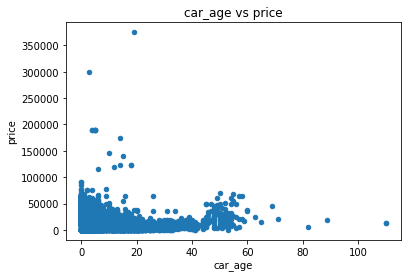

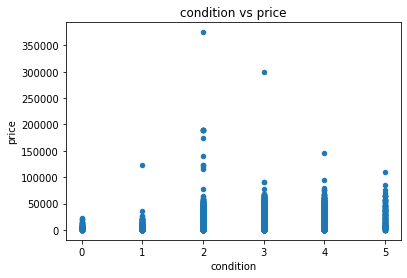

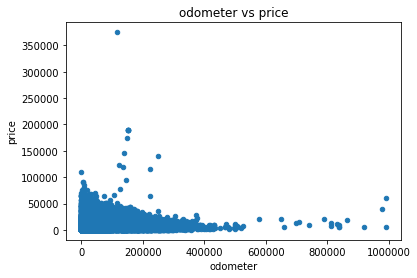

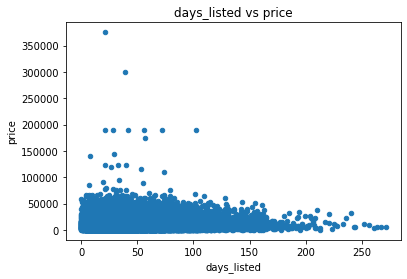

In [16]:
scatter_columns = ['car_age', 'condition', 'odometer', 'days_listed']

for i in vehicles[scatter_columns]:
    vehicles.plot(x = i, y = 'price', kind = 'scatter')
    plt.title(str(i) + " vs price")
    plt.show()


#----------------- Vehicles Data Scatter plots-----------------#



Text(0.5, 1.0, 'days_listed vs price')

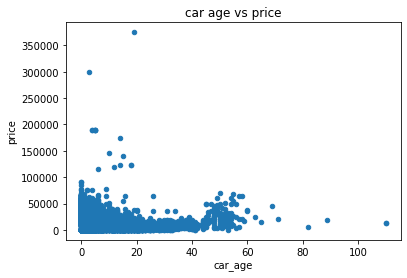

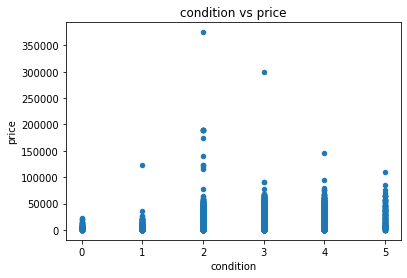

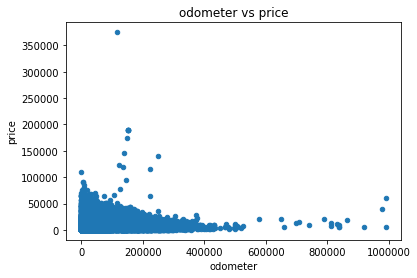

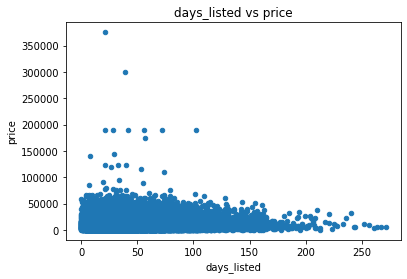

In [17]:
import matplotlib.pyplot as plt

print('\n#----------------- Vehicles Data Scatter plots-----------------#\n')


vehicles.plot(x = 'car_age', y = 'price', kind = 'scatter')
plt.title('car age vs price')

#scatter ylim should be corrected

vehicles.plot(x = 'condition', y = 'price', kind = 'scatter')
plt.title('condition vs price')

vehicles.plot(x = 'odometer', y = 'price', kind = 'scatter')
plt.title('odometer vs price')

vehicles.plot(x = 'days_listed', y = 'price', kind = 'scatter')
plt.title('days_listed vs price')

#### Scatter plots observations:

 
* car age vs price scatter plot:
    - There is a trend from age 20 and newer cars- price go steadly up.
    - car age 20-40 stagnation of steady low prices.
    - care age 40+ scattered results, could be that classic cars are in demand.
    - some possible outliars at car_age > 80 and car_price > 200K.

* odometer vs price scatter plot: visible trend as price decrease with higher mileage. 

* These scatter plots will remain as is, in order to make a comperison after the data filter that was conclude from histograms.




<AxesSubplot:>

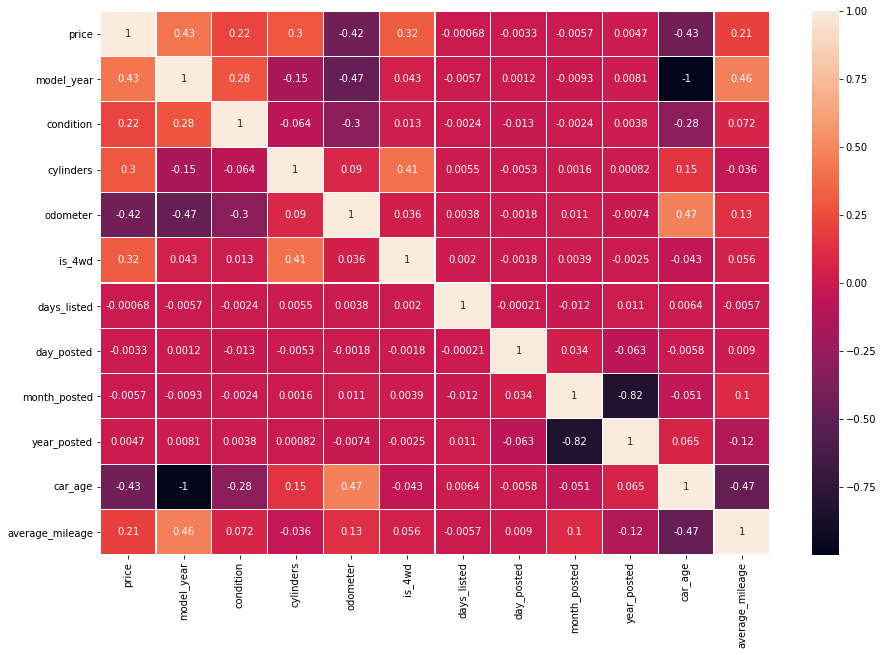

In [11]:
plt.figure(figsize = (15,10))
sns.heatmap(vehicles.corr(), annot = True, linewidth = 0.1)

<div class="alert alert-info"> >
Using the heatmap allows us to look for correlations. 
For example, we can see positive correlation between car_age and odometer, or negetive betwen average mileage and car age.
    
As this task was focused on which factors influence the price of a car, we will focus on the 'price' column:
- Positive correlation: model_year, is_4wd, condition.
- Negetive correlation: car age (the negetive value of model_year), odometer.
- The rest of the categories don't show weak connections / complex / non linear connection. 
   


</div>

<a class="anchor" id="step4.4"></a>

#### Identify Outliars

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc892a7cbd0>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc874092f50>]],
      dtype=object)

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,day_posted,month_posted,year_posted,car_age,average_mileage,year_est
count,287.000000,263.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,263.000000,287.000000,287.000000
mean,6890.839721,2002.889734,2.052265,6.947735,375554.888502,0.560976,39.738676,15.153310,6.216028,2018.337979,15.433460,36013.850174,2003.425087
std,6115.863680,6.065735,0.775986,1.436556,124589.560579,0.497135,27.573640,8.403557,3.374424,0.473848,6.102366,45549.202504,6.100309
min,500.000000,1964.000000,0.000000,4.000000,300001.000000,0.000000,1.000000,1.000000,1.000000,2018.000000,0.000000,10433.000000,1964.000000
25%,2997.500000,1999.000000,2.000000,6.000000,315000.000000,0.000000,20.000000,8.000000,3.000000,2018.000000,12.000000,18142.500000,1999.000000
50%,5500.000000,2003.000000,2.000000,8.000000,332019.000000,1.000000,33.000000,14.000000,6.000000,2018.000000,15.000000,23127.000000,2004.000000
75%,8837.500000,2006.500000,2.000000,8.000000,376950.000000,1.000000,53.000000,22.000000,9.000000,2019.000000,19.000000,32678.500000,2007.000000
max,59900.000000,2018.000000,5.000000,10.000000,990000.000000,1.000000,150.000000,31.000000,12.000000,2019.000000,54.000000,373200.000000,2018.000000


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_age,average_mileage,year_est
40729,4700,2013.0,chevrolet cruze,2,6.0,gas,990000.0,automatic,sedan,black,0.0,2018-05-02,4,2,5,2018,5.0,198000.0,2013.0
17869,59900,1964.0,chevrolet corvette,4,8.0,gas,990000.0,automatic,convertible,red,0.0,2018-06-17,28,17,6,2018,54.0,18333.0,1964.0
48962,40000,2014.0,ram 3500,3,6.0,diesel,980000.0,automatic,truck,white,1.0,2018-12-06,7,6,12,2018,4.0,245000.0,2014.0
14245,6000,1996.0,ram 2500,2,10.0,gas,920000.0,automatic,truck,blue,0.0,2019-02-02,43,2,2,2019,23.0,40000.0,1996.0
2840,18500,2014.0,ford explorer,3,6.0,gas,866000.0,automatic,SUV,black,1.0,2018-07-20,14,20,7,2018,4.0,216500.0,2014.0


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_age,average_mileage,year_est
20700,109999,NaN,chevrolet corvette,5,8.0,gas,35.0,automatic,coupe,white,0.0,2018-09-07,74,7,9,2018,NaN,2.0,2000.0
4307,65500,2019.0,ram 3500,4,6.0,diesel,500.0,automatic,pickup,unknown,1.0,2019-02-14,48,14,2,2019,0.0,500.0,2019.0
29092,65500,2018.0,ram 3500,4,6.0,diesel,500.0,automatic,pickup,blue,1.0,2018-10-07,10,7,10,2018,0.0,500.0,2018.0
28986,64493,2018.0,chevrolet silverado 3500hd,5,8.0,diesel,7.0,automatic,truck,unknown,1.0,2018-12-19,4,19,12,2018,0.0,7.0,2018.0
38199,64493,2018.0,chevrolet silverado 3500hd,5,8.0,diesel,5.0,automatic,truck,white,1.0,2018-06-11,39,11,6,2018,0.0,5.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23602,1,2007.0,chevrolet tahoe,4,8.0,gas,1.0,automatic,SUV,blue,0.0,2018-10-26,11,26,10,2018,11.0,0.0,2007.0
23804,1,2007.0,chevrolet tahoe,4,8.0,gas,1.0,automatic,SUV,blue,0.0,2019-01-21,54,21,1,2019,12.0,0.0,2007.0
23811,1,2007.0,chevrolet tahoe,4,8.0,gas,1.0,automatic,SUV,blue,0.0,2018-07-02,47,2,7,2018,11.0,0.0,2007.0
23986,1,2007.0,chevrolet tahoe,4,8.0,gas,1.0,automatic,SUV,unknown,0.0,2018-08-25,29,25,8,2018,11.0,0.0,2007.0


,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,day_posted,month_posted,year_posted,car_age,average_mileage,year_est
count,838.000000,781.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,781.000000,836.000000,838.000000
mean,10076.383055,2007.800256,2.792363,5.922434,121.575179,0.379475,38.602625,15.410501,6.511933,2018.305489,10.505762,34.710526,2007.949881
std,11198.430082,8.546467,0.914421,1.712265,152.138656,0.485546,26.694624,8.732777,3.423403,0.460889,8.596900,133.709310,8.296470
min,1.000000,1962.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2018.000000,0.000000,0.000000,1962.000000
25%,3900.000000,2004.000000,2.000000,4.000000,1.000000,0.000000,19.000000,8.000000,3.000000,2018.000000,5.000000,0.000000,2005.000000
50%,6900.000000,2009.000000,3.000000,6.000000,113.000000,0.000000,33.000000,15.000000,7.000000,2018.000000,10.000000,12.000000,2009.000000
75%,10900.000000,2013.000000,3.000000,8.000000,168.000000,1.000000,53.000000,23.000000,9.000000,2019.000000,14.000000,18.000000,2013.000000
max,109999.000000,2019.000000,5.000000,10.000000,999.000000,1.000000,177.000000,31.000000,12.000000,2019.000000,57.000000,999.000000,2019.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc86f6878d0>]],
      dtype=object)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_age,average_mileage,year_est
19119,384,2018.0,chrysler 300,4,6.0,gas,10.0,automatic,sedan,silver,1.0,2018-05-03,16,3,5,2018,0.0,10.0,2018.0
4062,37490,2018.0,gmc sierra 2500hd,5,8.0,gas,23.0,automatic,pickup,black,1.0,2018-10-14,20,14,10,2018,0.0,23.0,2018.0
15745,23800,2018.0,chevrolet camaro lt coupe 2d,2,6.0,gas,977.0,other,coupe,red,0.0,2018-05-20,66,20,5,2018,0.0,977.0,2018.0
18967,475,2018.0,jeep wrangler,4,6.0,gas,10.0,automatic,SUV,unknown,1.0,2018-06-26,25,26,6,2018,0.0,10.0,2018.0
6612,23800,2018.0,chevrolet camaro lt coupe 2d,2,6.0,gas,977.0,other,coupe,red,0.0,2018-09-10,27,10,9,2018,0.0,977.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47264,9000,NaN,nissan frontier,2,6.0,gas,146.0,automatic,truck,unknown,0.0,2018-08-15,10,15,8,2018,NaN,24.0,2012.0
48246,11888,NaN,chevrolet silverado 1500,2,8.0,gas,0.0,automatic,truck,white,0.0,2018-08-07,103,7,8,2018,NaN,0.0,2011.0
50412,25500,NaN,jeep wrangler,2,6.0,gas,0.0,automatic,SUV,yellow,1.0,2018-06-12,48,12,6,2018,NaN,0.0,2008.0
50860,1800,NaN,subaru outback,2,4.0,gas,195.0,automatic,wagon,unknown,1.0,2019-02-11,40,11,2,2019,NaN,22.0,2010.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc86f5cf450>]],
      dtype=object)

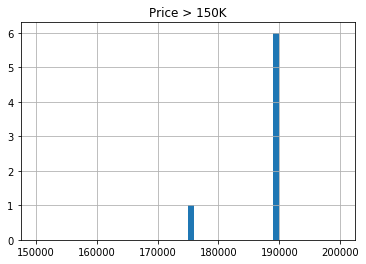

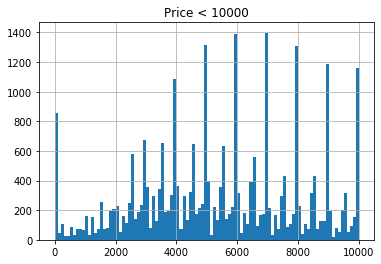

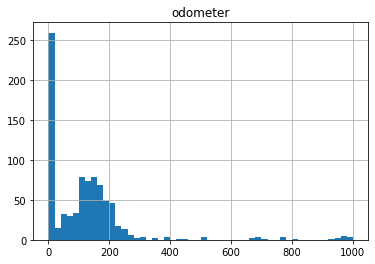

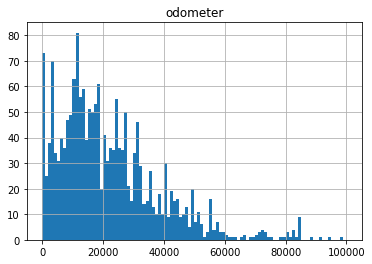

In [19]:
# IDENTIFY OUTLIARS


import matplotlib.pyplot as plt

# IDENTIFY OUTLIARS, remove and store them in different dataset. Explain how the effect the data 



####-------------PRICE outliars-----------------####


# outliars at high price

#display(vehicles.query('price > 40000').sort_values('price', ascending = False))
#display(vehicles[vehicles['price'] > 40000].hist('price', bins = 50 ,range = (40000, 200000)))
#plt.title('Price > 40K')

# Above 40K - Many pickups and SUV cars, 4WD drive at the rangs of 40-70K, or more exotic cars (coupe), reasoanable.
# It is decided not to removes these data any try to look for outliars at 150K:

#display(vehicles.query('price > 150000').sort_values('price', ascending = False))
display(vehicles[vehicles['price'] > 150000].hist('price', bins = 50 ,range = (150000, 200000)))
plt.title('Price > 150K')

# FILTER - 150K and above will be filtered, all pickup cars which are way overpriced. 



##outliar at low price

#display(vehicles.query('price <10000').sort_values('price', ascending = False))
#display(vehicles.query('price <10000').describe())
display(vehicles[vehicles['price'] < 10000].hist('price', bins = 100 ,range = (0, 10000)))
plt.title('Price < 10000')

# We can see intresting spikes at the 1000 intervals and more moderate at 500 between, probably due to human preference. 
# Spikes disappear at the 2000 price point and down, further looking into that data set shows data that doesn't make sense.
# about 850 cars are with a cost of 0%, we can see the median is 1$ for cars < 1000$.


# FILTER - 1000$ and bottom 




####-------------odometer outliars-----------------####



# outliars at high odometer

# check odometer high values
display(vehicles.query('odometer > 300000').describe())
display(vehicles.query('odometer > 300000').sort_values('odometer', ascending = False).head(5))
#display(vehicles.query('odometer > 300000').pivot_table(index = 'type', values = ('odometer', 'car_age', 'average_mileage'), aggfunc = ['mean', 'median', 'count']))


# FILTER - odometer > 300000 and average mileage > 35000 


# outliars at low odometer
display(vehicles.query('odometer <1000').sort_values('price', ascending = False))
display(vehicles.query('odometer <1000').describe())
display(vehicles[vehicles['odometer'] < 1000].hist('odometer', bins = 50 ,range = (0, 1000)))
display(vehicles.query('odometer <1000').sort_values('car_age', ascending = True))
#display(vehicles.query('odometer <1000').groupby('car_age')['odometer'].count())


# Observations: 
# Median for 1000 lowest odometers: 113 meters only! with median year model of 2009, clearly doesn't make sense.
# spike again at the 1000 & 500 intervals , obvioues. about 240 cars with at the zone of 0 odometer. 
# describe method shows 185 cars with zero value, it is shown in the histogram as well with high resolution. 
# very obvioues there are not cars with odometer between 400-1000, meaning this big chunk of at 0-200 odometer is false

# FILTER - odometer < 1000 & car age > 5




####-------------car age outliars------------####



# check data about cars with 0 age - is it brend new? is it with 0 odometer?

#display(vehicles.query('car_age == 0').describe())
#display(vehicles.query('car_age == 0').sort_values('odometer', ascending = True).head(5))


vehicles.query('car_age == 0').hist('odometer', bins = 100, range = (0,100000))


# The number 50000 for itself reflacts a very high mileage per day, which can get to 120 km. However, it is possible for long commute or people who use their car for job purposes, 
# Number of cars with age = 0 and odometer > 50000 : 115

#display(len(vehicles.query('car_age == 0 and odometer > 50000')))

# FILTER -  car_age == 0 and odometer > 50000.




####-------------FINAL FILTERS-----------------####

# price    - FILTER - 60K and above will be filtered if type is pickup or truck.
# price    - FILTER - Data from 2000$ and bottom 
# odometer - FILTER - odometer < 1000 and car_age > 5 (very conservitive) 
# odometer - FILTER - odometer > 300000 and average_mileage > 35000                                       
# car age  - FILTER - age == 0 and odometer > 50000  


<a class="anchor" id="step4.5"></a>
##### Removing outliars to a new table 

In [20]:
### Removing outliars to a new table, making a table vehicles_filter
#vehicles_outliars = pd.DataFrame(columns = vehicles.columns)

print('vehicles initial df len:', len(vehicles))
# check each outliar seperatly 
low_price_outliars = vehicles.query('price < 1000')
high_price_outliars = vehicles.query('price > 150000 and type == ("pickup", "truck")')
odometer_outliars = vehicles.query('(odometer < 1000 and car_age > 5) or (odometer > 300000 and average_mileage > 35000) or odometer > 800000')
age_outliars = vehicles.query('car_age == 0 and odometer > 50000')


print('\nlow_price_outliars len:', len(low_price_outliars))
print('\nhigh_price_outliars len:', len(high_price_outliars))
print('\nodometer_outliars len:', len(odometer_outliars))

print('\nage_outliars len:', len(age_outliars))

# use all filters to create a total outliars df. 
total_outliars = vehicles.query('(price < 1000) or (price > 150000) or (odometer < 1000 and car_age > 5) or (car_age == 0 and odometer > 50000) or odometer > 800000')
print('\ntotal outliars len:', len(total_outliars))


# create a df with after filter 
vehicles_filtered = vehicles.query('index not in (@total_outliars.index)')


print('vehicles_total_filtered len:', len(vehicles_filtered))
display(vehicles_filtered.head(10))


display(total_outliars)


vehicles initial df len: 50976

low_price_outliars len: 1390

high_price_outliars len: 9

odometer_outliars len: 622

age_outliars len: 115

total outliars len: 2046
vehicles_total_filtered len: 48930


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_age,average_mileage,year_est
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,23,6,2018,7.0,20714.0,2011.0
1,25500,NaN,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,19,10,2018,NaN,12672.0,2011.0
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,7,2,2019,6.0,18333.0,2013.0
3,1500,2003.0,ford f-150,1,8.0,gas,NaN,automatic,pickup,unknown,0.0,2019-03-22,9,22,3,2019,16.0,NaN,2003.0
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2,4,2019,2.0,40452.0,2017.0
5,14990,2014.0,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,20,6,2018,4.0,14488.0,2014.0
6,12990,2015.0,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,27,12,2018,3.0,26404.0,2015.0
7,15990,2013.0,honda pilot,3,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,7,1,2019,6.0,18246.0,2013.0
8,11500,2012.0,kia sorento,3,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19,16,7,2018,6.0,17362.0,2012.0
9,9200,2008.0,honda pilot,3,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,15,2,2019,11.0,13381.0,2008.0


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_age,average_mileage,year_est
73,1900,1994.0,jeep grand cherokee laredo,2,6.0,gas,207.0,automatic,SUV,grey,1.0,2018-07-27,9,27,7,2018,24.0,9.0,1994.0
218,500,2004.0,toyota corolla,4,4.0,gas,NaN,automatic,sedan,blue,0.0,2018-09-17,24,17,9,2018,14.0,NaN,2004.0
222,2750,2006.0,honda civic lx,2,4.0,gas,200.0,manual,sedan,black,0.0,2018-07-06,41,6,7,2018,12.0,17.0,2006.0
317,600,1999.0,toyota camry le,0,4.0,gas,216348.0,automatic,sedan,white,0.0,2019-03-04,23,4,3,2019,20.0,10817.0,1999.0
332,500,2004.0,toyota corolla,4,4.0,gas,226980.0,automatic,sedan,unknown,0.0,2018-09-19,19,19,9,2018,14.0,16213.0,2004.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51328,22995,2009.0,gmc sierra 2500hd,3,8.0,gas,187.0,automatic,truck,black,1.0,2018-06-10,37,10,6,2018,9.0,21.0,2009.0
51331,14995,2009.0,gmc sierra,3,8.0,gas,150.0,automatic,truck,blue,1.0,2019-02-25,28,25,2,2019,10.0,15.0,2009.0
51364,299,2004.0,toyota camry,3,4.0,gas,185234.0,automatic,sedan,silver,0.0,2018-12-09,5,9,12,2018,14.0,13231.0,2004.0
51394,950,2005.0,ford f-250,1,8.0,gas,174000.0,automatic,van,white,0.0,2018-06-06,44,6,6,2018,13.0,13385.0,2005.0


<a class="anchor" id="step4.6"></a>
#### Analysis of the general data after filering ourliars

#-----------------Vehicles filered  Histograms-----------------#



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc86f3fda50>]],
      dtype=object)

count     48930.000000
mean      12453.307112
std        9526.785847
min        1000.000000
25%        5500.000000
50%        9600.000000
75%       16995.000000
max      145000.000000
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc86f2ab610>]],
      dtype=object)

count    47906.000000
mean         8.556966
std          6.295266
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: car_age, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc86f18ec90>]],
      dtype=object)

count    41796.0
mean         inf
std          NaN
min          0.0
25%      10722.0
50%      15143.0
75%      21518.5
max          inf
Name: average_mileage, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc86f084290>]],
      dtype=object)

count     41798.000000
mean     117871.848725
std       62337.942083
min           0.000000
25%       74000.000000
50%      115000.000000
75%      156000.000000
max      790000.000000
Name: odometer, dtype: float64

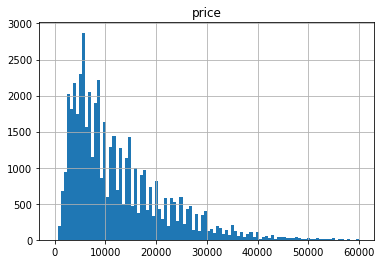

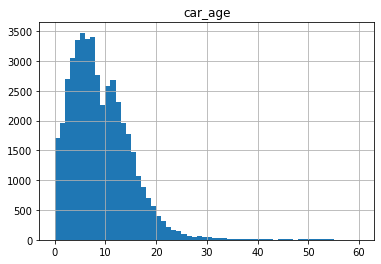

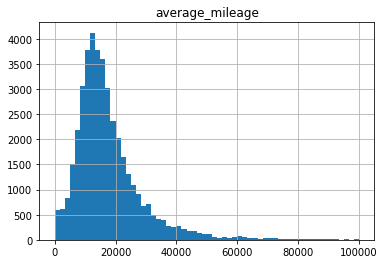

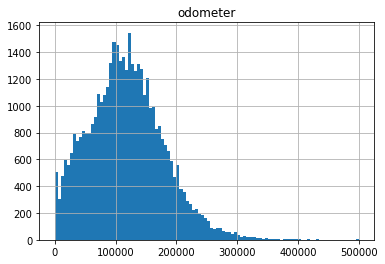

In [21]:
######## FILTERED DATA #############


# Preliminary analysis of the data using histograms

### stage 1. plot histograms for the columns: price, car_age, odometer, cylinders and condition.


print('#-----------------Vehicles filered  Histograms-----------------#\n')

#display(vehicles.hist('price', bins = 100, range = (0, 60000)))
#display(vehicles.price.describe())
display(vehicles_filtered.hist('price', bins = 100, range = (0, 60000)))
display(vehicles_filtered.price.describe())

#display(vehicles.hist('car_age', bins = 60, range = (0, 60)))
#display(vehicles.car_age.describe())
display(vehicles_filtered.hist('car_age', bins = 60, range = (0, 60)))
display(vehicles.car_age.describe())


#display(vehicles.hist('average_mileage', bins = 60, range = (0, 100000)))
#display(vehicles.average_mileage.describe())
display(vehicles_filtered.hist('average_mileage', bins = 60, range = (0, 100000)))
display(vehicles_filtered.average_mileage.describe())


#display(vehicles.hist('odometer', bins = 100, range = (0, 500000)))
#display(vehicles.odometer.describe())
display(vehicles_filtered.hist('odometer', bins = 100, range = (0, 500000)))
display(vehicles_filtered.odometer.describe())







#### Conclusions:

*  PRICE, AVERAGE MILEAGE AND ODOMETER - all spikes at the bottom part have been removed, meaning that a big part of the cleaning is ok.
* average_mileage describ() showed an average of inf, meaning the preprocessing should be revived again.
* The total number of removed data is smaller then 5%, this does not changes dramaticlly the preliminary analysis. 
* The long tail distrubions still exists with exteme values due to exceptionl cars, for examples very old cars or luxury cars.
* People tend to published rounded data for price and odometers.

* Need to check if for private cases - there is a normal distrubtion, compare to this one. 


<a class="anchor" id="step4.9"></a>
#### Days listed analysis

count    48930.000000
mean        39.574699
std         28.239580
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc86eebe350>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc86ecadc10>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc86ec2a490>]],
      dtype=object)

Text(0.5, 1.0, 'days_listed_slow')

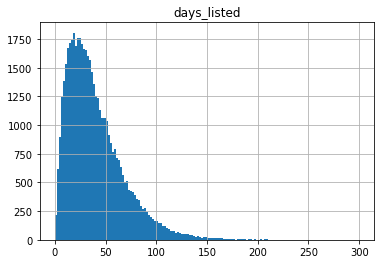

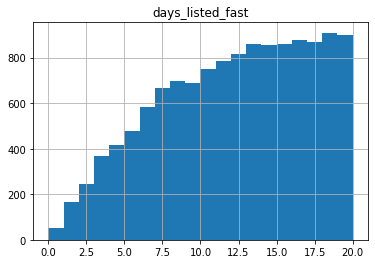

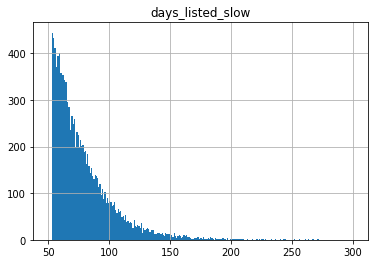

In [22]:
# DAYS LISTED


display(vehicles_filtered.days_listed.describe())
display(vehicles_filtered.hist('days_listed', bins = 150, range = (0, 300)))

## what we see on histogram and describe:
# we see a long-tail distrubition, with mean of 39 and std 28.
# median = 33 days

#Slice the upper and down limits: 19 days and 53 days
days_listed_fast = vehicles_filtered.query('days_listed <= 19')
#display(days_listed_fast.describe())
display(days_listed_fast.hist('days_listed', bins = 20, range = (0, 20)))
plt.title('days_listed_fast')


days_listed_slow = vehicles_filtered.query('days_listed >= 53')
#display(days_listed_slow.describe())
display(days_listed_slow.hist('days_listed', bins = 250, range = (50, 300)))
plt.title('days_listed_slow')


# conclusion: no visible correlation has been observed
# both days_listed_fast and days_listed_slow show the same general stats in describe - both in mean and medain of all columns



###########################################################################################################################

# Personal code for self review



# questions to ask:
# we already know by looking at the big picture before that there is no normal distibution, so trying to find any cause to days_listed should be researched in a differnt approch. 

# We see at the earlier scatter plots (before removing outliars), that car_age and odometer make a difference in car price.
# Let's compare apples to apples - lets see car with the same charateristics: (similar odometer range, same year age, same condition)
# For this parituclar car, we will put a scatter plot of price vs days_listed and see how it compares. 

#display(vehicles_filtered[vehicles_filtered['type'] == "SUV"].describe())
#suv_data = vehicles_filtered.query('type == "SUV"')


#display(suv_data.model.value_counts())
# The chosen model- jeep wrangler 
#wrangler_data = suv_data.query('model == "jeep wrangler"')
#display(wrangler_data.groupby('model_year')['odometer'].count())
# we see a good counts of data at 2007
#wrangler_2007 = wrangler_data.query('model_year == 2007')
#display(wrangler_2007.describe())
#wrangler_2007.plot(x = 'days_listed', y = 'odometer', kind = 'scatter')
#plt.title('days_listed vs price')


#suv_table = suv_data.pivot_table(index = 'model', values = 'price', aggfunc = ['count', 'median', 'mean'])
#display(suv_table.columns)
#display(suv_table.sort_values(('count', 'price'), ascending = False))

#########################################################################################################################







<div class="alert alert-success"> <b>Reviewer comment:</b> 
    
Note that our actions are repeated in terms of plotting.
    
This suggests that we can create a function that will do all the actions for us.
    
Thus, we will be able to optimize our code and project as a whole.
    
</div>

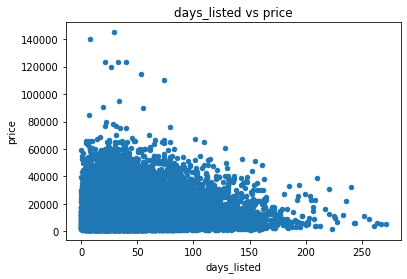

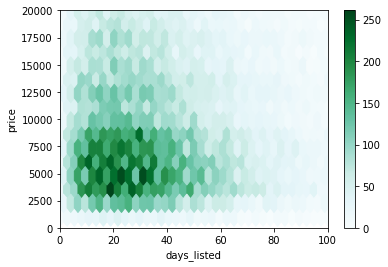

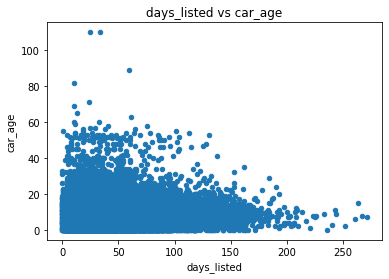

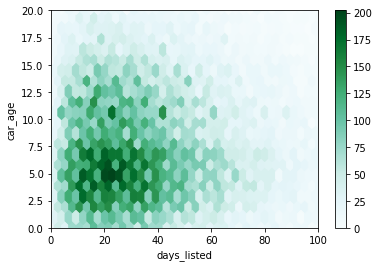

In [23]:
# USING SCATTER PLOTS


# Lets try to look for extreame values using scatter plots

# quick look at some stats
vehicles_filtered.plot(x = 'days_listed', y = 'price', kind = 'scatter')
plt.title('days_listed vs price')
vehicles_filtered.plot(x = 'days_listed', y = 'price', ylim = (0, 20000), xlim = (0,100), sharex = False, kind = 'hexbin')


vehicles_filtered.plot(x = 'days_listed', y = 'car_age', kind = 'scatter')
plt.title('days_listed vs car_age')
vehicles_filtered.plot(x = 'days_listed', y = 'car_age', ylim = (0, 20), xlim = (0,100), sharex = False, kind = 'hexbin')


#look at the extreme values of the scatter plots

# cars who are age > 60 does not stand for more then 75 days.





##### Conclusion: Scatter plots don't show significant trend 

<a class="anchor" id="step4.92"></a>
#### Statistical analysis following scatter plots

In [24]:
### Statistic calculations following the scatter plots:


#-------------------cars_sold_fast-------------------$

# PRICE - the cheaper cars listed for less time - cars less then 10000, i should caculate precentages.

total_length = len(vehicles_filtered)

cheap_cars = vehicles_filtered.query('price < 10000')
cheap_cars_percent = len(cheap_cars) / total_length
cheap_cars_fast_percent =  len(cheap_cars.query('days_listed <= 40')) / len(cheap_cars)

print('Percentage of cheap cars: {:.1%}'.format(cheap_cars_percent))
print('Percentage of cheap cars sold fast: {:.1%}'.format(cheap_cars_fast_percent))



# AGE - the cars less then 7 years listed for less time, i should caculate precentages.

young_cars = vehicles_filtered.query('car_age <= 7')
young_cars_percent = len(young_cars) / total_length
young_cars_fast_percent =  len(young_cars.query('days_listed <= 40')) / len(young_cars)


#young_cars.plot(x = 'days_listed', y = 'average_mileage', kind = 'scatter')
#young_cars.plot(x = 'days_listed', y = 'average_mileage', ylim = (0, 40000), xlim = (0,40), sharex = False, kind = 'hexbin')
# Despite scatter plots can suggets a very unlikly trend of higer avg_mileage correlating with low days_listed, the hexbin rules it out.

print('Percentage of young cars: {:.1%}'.format(young_cars_percent))
print('Percentage of young cars sold fast: {:.1%}'.format(young_cars_fast_percent))




# conclusion - we see that the hexbin plots is not enough in order to shed light regarding the cars who sell fast, becasue we need to corporate the statistics. 
# we see that the precteage of sold cars, both for cheap cars, and young cars, is a bit higher in relation to their % of the data.



#-------------------cars_sold_slow-------------------$

# we see in the scatter plots exreme values for cars who cross the 200 days mark. 

long_sell_cars = vehicles_filtered.query('days_listed > 200')

display(vehicles_filtered.describe())
display(long_sell_cars.describe())

#display(vehicles_filtered.type.value_counts())
#display(long_sell_cars.type.value_counts())


#display(long_sell_cars)
#display(len(vehicles_filtered.query('model_year > 2004')) / total_length)
#display(len(long_sell_cars.query('model_year > 2004')) / len(long_sell_cars))

    
# Conculsion - No real correlation was found between cars who sold slow to any type of the give parameters.
# The hexbin plots allows to distinguish and show the extreame values in order to investigae
# The very slow cars are of different types, with similar parameters of those of the total cars.



# Final conclusion - for long day_listed, the statistics stay similar, also for type of cars. This means that these cars represents the extreme values for each type, which are very minor compare to the general puplulation of the data.



Percentage of cheap cars: 53.0%
Percentage of cheap cars sold fast: 60.8%
Percentage of young cars: 47.0%
Percentage of young cars sold fast: 61.1%


,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,day_posted,month_posted,year_posted,car_age,average_mileage,year_est
count,48930.000000,45936.000000,48930.000000,48923.000000,41798.000000,48930.000000,48930.000000,48930.000000,48930.000000,48930.000000,45936.000000,41796.0,48930.000000
mean,12453.307112,2009.727882,2.637441,6.107598,117871.848725,0.494257,39.574699,15.446250,6.626221,2018.308114,8.580090,inf,2009.766135
std,9526.785847,6.178440,0.706958,1.637324,62337.942083,0.499972,28.239580,8.736424,3.475784,0.461719,6.190044,NaN,6.023214
min,1000.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2018.000000,0.000000,0.0,1908.000000
25%,5500.000000,2006.000000,2.000000,4.000000,74000.000000,0.000000,19.000000,8.000000,3.000000,2018.000000,4.000000,10722.0,2007.000000
50%,9600.000000,2011.000000,3.000000,6.000000,115000.000000,0.000000,33.000000,15.000000,7.000000,2018.000000,7.000000,15143.0,2011.000000
75%,16995.000000,2014.000000,3.000000,8.000000,156000.000000,1.000000,53.000000,23.000000,10.000000,2019.000000,12.000000,21518.5,2014.000000
max,145000.000000,2019.000000,5.000000,12.000000,790000.000000,1.000000,271.000000,31.000000,12.000000,2019.000000,110.000000,inf,2019.000000


,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,day_posted,month_posted,year_posted,car_age,average_mileage,year_est
count,32.000000,29.000000,32.000000,32.000000,26.000000,32.000000,32.000000,32.000000,32.000000,32.000000,29.000000,26.000000,32.000000
mean,12557.343750,2011.793103,2.656250,5.562500,101462.576923,0.531250,225.343750,15.187500,6.468750,2018.343750,6.551724,17947.653846,2011.625000
std,9478.303974,3.677920,0.700662,1.501343,39064.410383,0.507007,21.790216,8.844307,3.818329,0.482559,3.631078,9192.945256,3.598835
min,1500.000000,2004.000000,2.000000,4.000000,34871.000000,0.000000,201.000000,2.000000,1.000000,2018.000000,0.000000,6867.000000,2004.000000
25%,5871.250000,2009.000000,2.000000,4.000000,67330.750000,0.000000,206.750000,8.750000,3.000000,2018.000000,4.000000,11293.750000,2009.000000
50%,9440.000000,2011.000000,3.000000,6.000000,102305.500000,1.000000,221.000000,15.000000,6.500000,2018.000000,7.000000,15800.000000,2011.000000
75%,16425.000000,2015.000000,3.000000,6.000000,128000.000000,1.000000,240.750000,21.750000,10.000000,2019.000000,9.000000,22572.750000,2014.250000
max,38900.000000,2019.000000,4.000000,8.000000,180000.000000,1.000000,271.000000,31.000000,12.000000,2019.000000,15.000000,37050.000000,2019.000000


<a class="anchor" id="step4.93"></a>
####  Analyze the number of ads and the average price for each type of vehicle

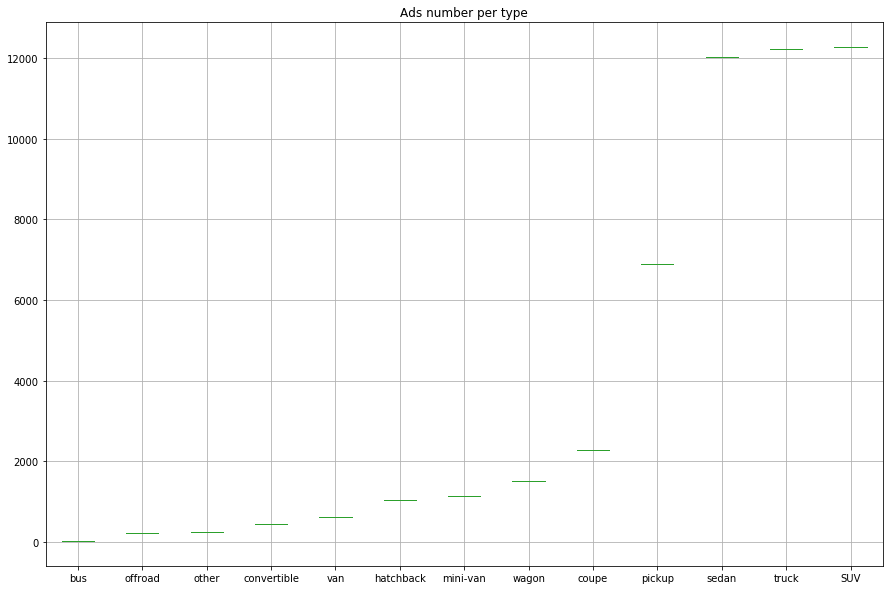

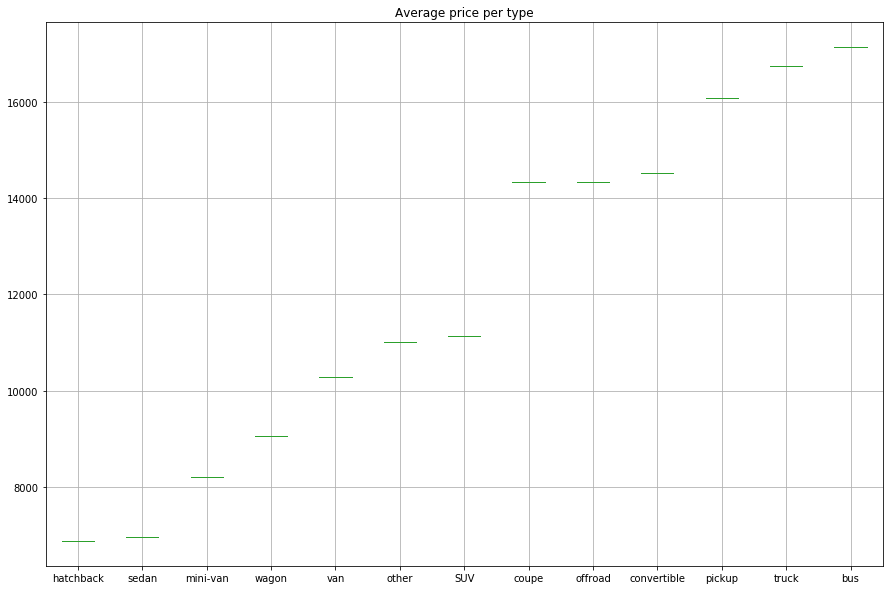

In [25]:
############# Analyze the number of ads and the average price for each type of vehicle.


# first look at value_counts
# display(vehicles_filtered.type.value_counts())

vehicles_type_count = vehicles.pivot_table(index = 'type', values = 'year_est', aggfunc = 'count')
vehicles_type_count_t = vehicles_type_count.sort_values('year_est', ascending = True).T
#display(vehicles_type_count)
vehicles_type_count_t.boxplot(figsize = (15, 10))
plt.title('Ads number per type')
plt.show()
# build a function that receives a df and a column name

vehicles_type_price = vehicles.pivot_table(index = 'type', values = 'price', aggfunc = 'mean')
vehicles_type_price_t = vehicles_type_price.sort_values('price', ascending = True).T
#display(vehicles_type_price)
vehicles_type_price_t.boxplot(figsize = (15, 10))
plt.title('Average price per type')
plt.show()





# extract a slice for each value of the column

#build a function that recives a df a type





# for each slice - extract the average price. 

#### Conclusion: The two most common types are suv and truck

<a class="anchor" id="step4.94"></a>
#### Type 'truck' analysis

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_age,average_mileage,year_est
22,7500,2004.0,chevrolet silverado,4,8.0,gas,180000.0,automatic,truck,red,1.0,2019-01-05,64,5,1,2019,15.0,12000.0,2004.0
39,8000,2009.0,ford f-150,2,8.0,gas,234000.0,automatic,truck,black,1.0,2019-03-31,1,31,3,2019,10.0,23400.0,2009.0
50,6200,2006.0,ford f-150,3,6.0,gas,69698.0,automatic,truck,custom,0.0,2018-05-03,50,3,5,2018,12.0,5808.0,2006.0
53,10400,2012.0,chevrolet colorado,3,5.0,gas,111871.0,automatic,truck,red,1.0,2019-01-30,27,30,1,2019,7.0,15982.0,2012.0
60,13000,2005.0,ram 1500,2,8.0,gas,146000.0,automatic,truck,grey,1.0,2019-03-14,26,14,3,2019,14.0,10429.0,2005.0


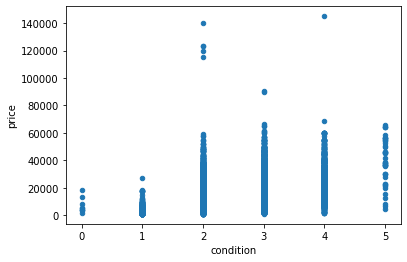

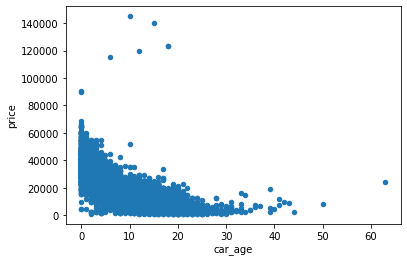

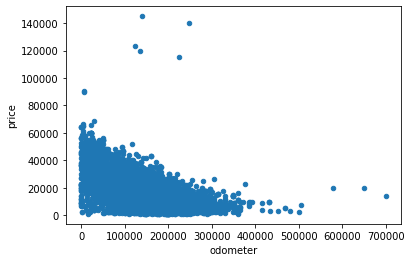

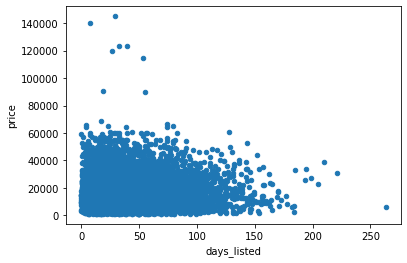

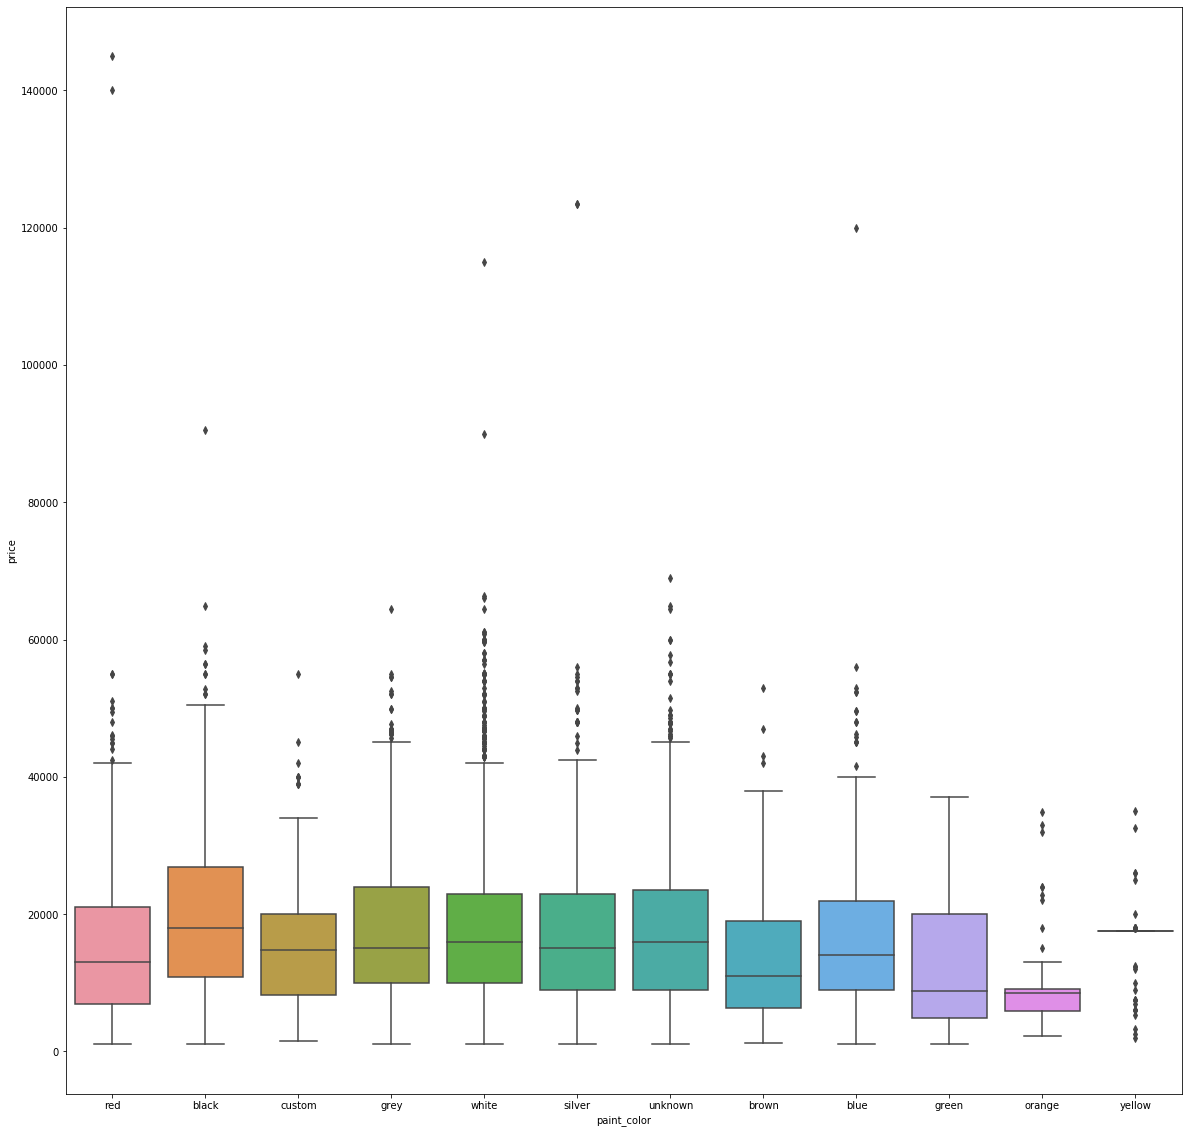

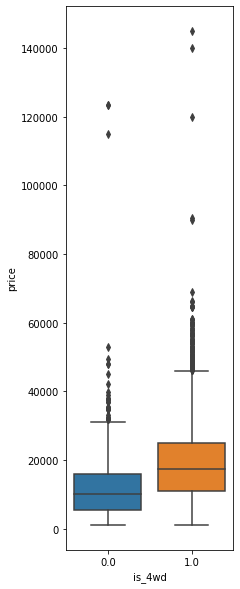

In [26]:
import numpy as np
import pylab
import seaborn as sns 



### truck analysis

# slice the data for truck type
truck_slice = vehicles_filtered.query('type == "truck"')
display(truck_slice.head(5))
truck_slice.describe()
truck_slice.model.unique()


truck_slice.plot(x = 'condition', y = 'price', kind = 'scatter')

truck_slice.plot(x = 'car_age', y = 'price', kind = 'scatter')
#truck_slice.plot(x = 'car_age', y = 'price', ylim = (0, 30000), xlim = (0,20), sharex = False, kind = 'hexbin')

truck_slice.plot(x = 'odometer', y = 'price', kind = 'scatter')
#truck_slice.plot(x = 'odometer', y = 'price', ylim = (0, 30000), xlim = (0,300000), sharex = False, kind = 'hexbin')

truck_slice.plot(x = 'days_listed', y = 'price', kind = 'scatter')
#truck_slice.plot(x = 'days_listed', y = 'price', ylim = (0, 30000), xlim = (0,300), sharex = False, kind = 'hexbin')



### paint_color ###

#check counts
#display(truck_slice.paint_color.value_counts())
# we see that purple has only 16 counts, therfore it is not valid

truck_slice_no_purple = truck_slice.query('paint_color != "purple"')

plt.figure(figsize=(20,20))
sns.boxplot( x = truck_slice_no_purple['paint_color'], y = truck_slice_no_purple['price'])

### is_4wd ###

# check counts
#display(truck_slice.is_4wd.value_counts())
# we see both are valid

plt.figure(figsize=(3,10))
sns.boxplot( x = truck_slice['is_4wd'], y = truck_slice['price'])






<a class="anchor" id="step4.95"></a>

#### Type SUV Analysis

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_age,average_mileage,year_est
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,23,6,2018,7.0,20714.0,2011.0
7,15990,2013.0,honda pilot,3,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,7,1,2019,6.0,18246.0,2013.0
8,11500,2012.0,kia sorento,3,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19,16,7,2018,6.0,17362.0,2012.0
9,9200,2008.0,honda pilot,3,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,15,2,2019,11.0,13381.0,2008.0
14,12990,2009.0,gmc yukon,3,8.0,gas,132285.0,automatic,SUV,black,1.0,2019-01-31,24,31,1,2019,10.0,13228.0,2009.0


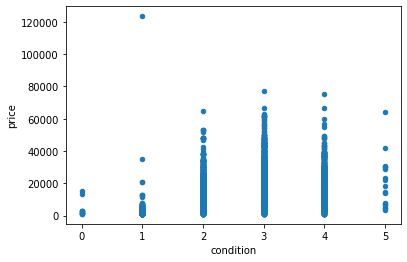

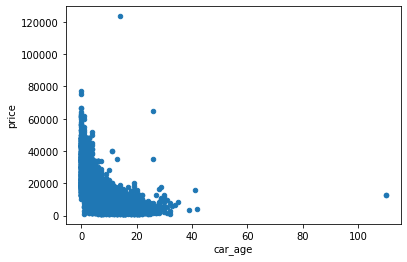

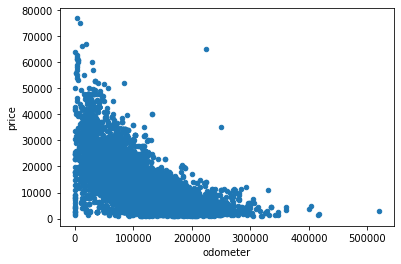

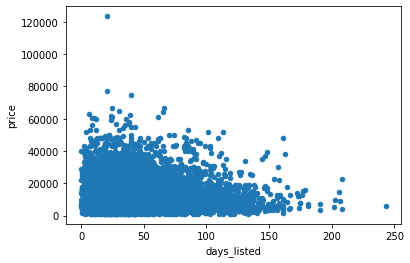

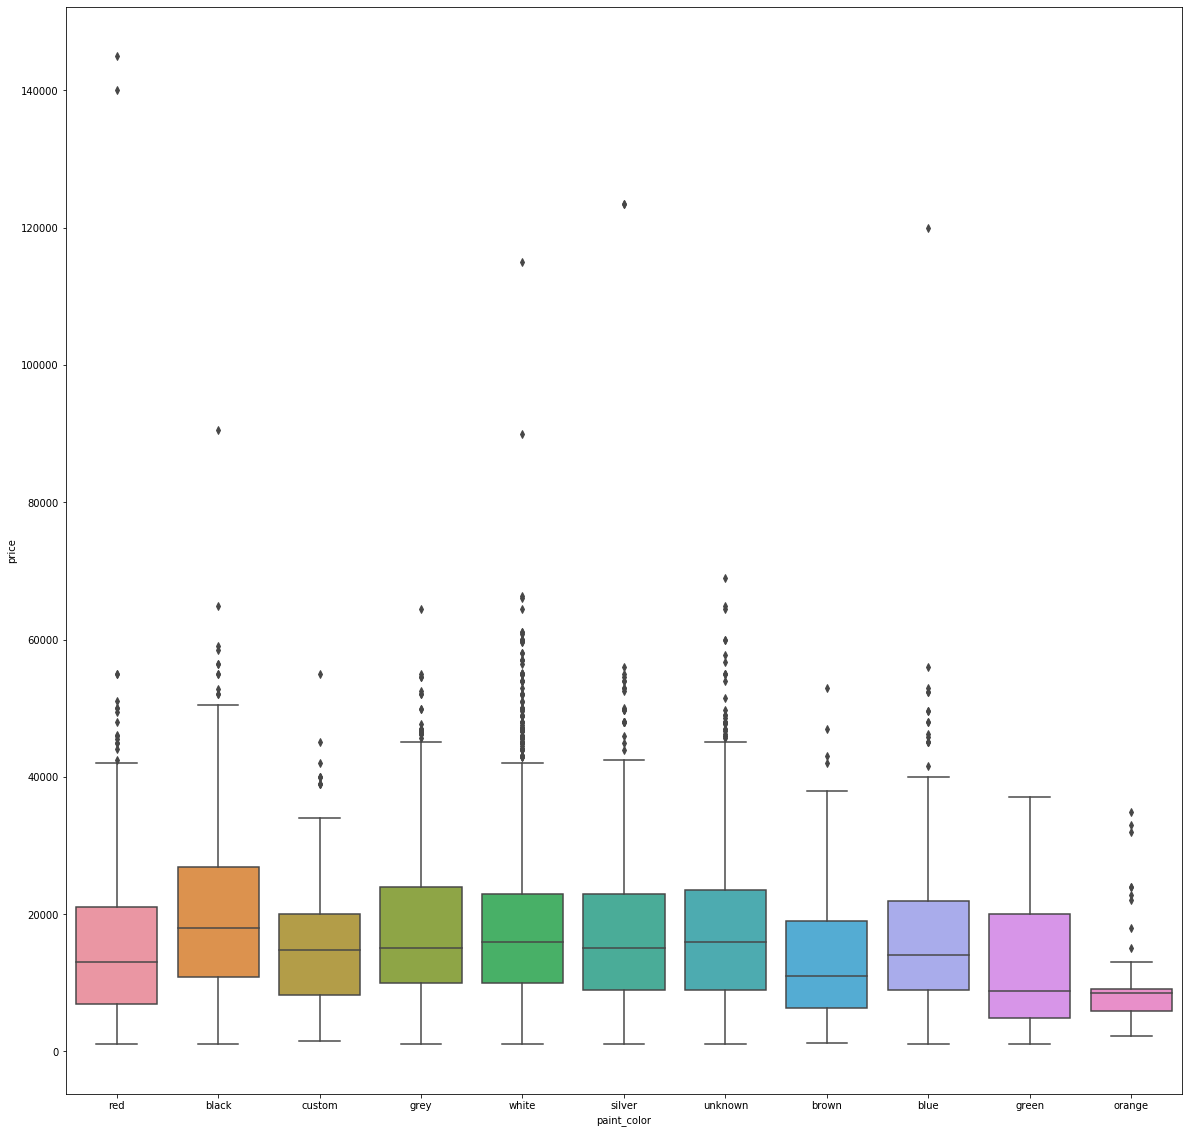

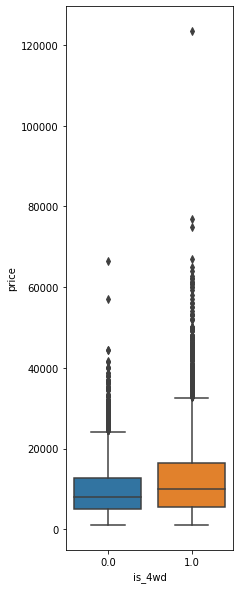

In [27]:
# SUV analysis

# slice the data for suv type
suv_slice = vehicles_filtered.query('type == "SUV"')
display(suv_slice.head(5))
suv_slice.describe()
suv_slice.model.unique()


#suv_slice.hist('price', bins = 100, range = (0, 60000))
#suv_slice.hist('car_age', bins = 60, range = (0, 60))
#suv_slice.hist('odometer', bins = 100, range = (0, 500000))
#suv_slice.hist('condition', bins = 20)
#suv_slice.hist('cylinders', bins = 10)

suv_slice.plot(x = 'condition', y = 'price', kind = 'scatter')

suv_slice.plot(x = 'car_age', y = 'price', kind = 'scatter')
#suv_slice.plot(x = 'car_age', y = 'price', ylim = (0, 30000), xlim = (0,20), sharex = False, kind = 'hexbin')

suv_slice.plot(x = 'odometer', y = 'price', kind = 'scatter')
#suv_slice.plot(x = 'odometer', y = 'price', ylim = (0, 30000), xlim = (0,300000), sharex = False, kind = 'hexbin')

suv_slice.plot(x = 'days_listed', y = 'price', kind = 'scatter')
#suv_slice.plot(x = 'days_listed', y = 'price', ylim = (0, 30000), xlim = (0,300), sharex = False, kind = 'hexbin')



### paint_color ###

#check counts
#display(suv_slice.paint_color.value_counts())
# we see that purple has only 16 counts, therfore it is not valid

suv_slice_no_purple_yellow = truck_slice.query('paint_color != ["purple", "yellow"]')

plt.figure(figsize=(20,20))
sns.boxplot( x = suv_slice_no_purple_yellow['paint_color'], y = suv_slice_no_purple_yellow['price'])

### is_4wd ###

# check counts
#display(suv_slice.is_4wd.value_counts())
# we see both are valid

plt.figure(figsize=(3,10))
sns.boxplot( x = suv_slice['is_4wd'], y = suv_slice['price'])




<a class="anchor" id="step5"></a>

### Step 5. Overall conclusion

#### Analysis conclusion

* New cars are sold quicker:
- cars below 7 years age accounts for 50.4% of the general dataa, yet it accounts for 62.1% of the ads that sells in under 40 days. 

* Cheap cars are sold quicker:
- cars under the price of 10k accounts for 47% of the general dta, yet it accounts for 61.1% of the ads that sells in under 40 days.


* Black color cars tend to be selled at higher price.
* 4wd cars are generally pricier.


* suggestions: The results are not conclusive and lacks statitical significance, We should compare apples to apples, meaning that in order to analysis a specific parameter, it might be better that all other parameters will be identical (for example, checking each model at a time, instead of the general data or the general type).


#### Personal notes conclusion
* Too much time was dedicated to the preprocessing part. 
* The decision to fill in missing values might turned out to be false. maybe it is better to drop immidiatly missing values rather then trying to fill them with estimated data. 
* Despite some numbers seems "tarriyfing" to drop, for example 7000 rows of missing odometer, it is might better. If 20K rows on the prveious tesk was ok for analysis, then 40K+ should be suffient for this task as well (hindsight conclusion).

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
- [x]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [x]  histograms for each parameter created
- [x]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [x]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [x]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn